In [1]:
#Set seed
import numpy as np
np.random.seed(31415)

In [2]:
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import IncrementalPCA as IPCA

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns
import pandas as pd

import torch

In [3]:
def load_embeddings(path):
    X = {}
    x_th = []
    for file in os.listdir(path):
        th_embd = torch.load(os.path.join(path, file))        
        X[file] = th_embd
        x_th.append(th_embd)
        
    x_th = torch.cat(x_th, axis=0)
        
    return X, x_th

In [4]:
path_test = 'SpeakerRecognition_tutorial/elia_embeddings/no_average/test/'
path_enroll =  'SpeakerRecognition_tutorial/elia_embeddings/average/enroll/'

labels = [f.split('.')[0] for f in os.listdir(path_enroll)]

In [5]:
_, x_enroll = load_embeddings(path_enroll)
x_test, _ = load_embeddings(path_test)

### Load embeddings

In [6]:


# Compute tsne
enroll_tsne = TSNE(n_components=2, random_state=10, init='pca', verbose=0).fit_transform(x_enroll)

### Load test

In [7]:
idx_user = 9
test_user = labels[idx_user] + '.pth'

In [8]:
print(test_user)
x_test[test_user].shape

240M3063.pth


torch.Size([8, 128])

In [9]:
test_tsne = TSNE(n_components=2, random_state=10, init='pca', verbose=0).fit_transform(x_test[test_user])

In [10]:
color = plt.cm.rainbow(np.linspace(0,1, len(labels)))

#color = ['black', 'darkorange', 'lime', 'blue', 'red', 'pink']

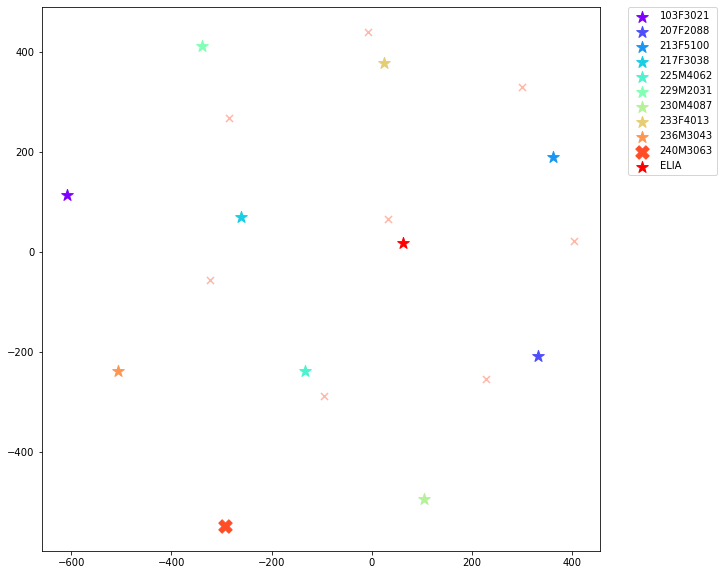

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
for i in range(enroll_tsne.shape[0]):
    x_e = enroll_tsne[i,0]
    y_e = enroll_tsne[i,1]
    
    if i == idx_user:
        ax.scatter(x_e, y_e, marker='X', s=180, color=color[i], label=labels[i],
                   alpha=1.0)
    else:
        ax.scatter(x_e, y_e, marker='*', s=150, color=color[i], label=labels[i],
                   alpha=1.0)
    
for k in range(test_tsne.shape[0]):
    x_t = test_tsne[k, 0]
    y_t = test_tsne[k, 1]

    ax.scatter(x_t, y_t, marker='x',s=50, color=color[idx_user], alpha=0.4)
    
    
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()